In [140]:
from sympy import *
init_printing() #for pretty printing of symbolic maniputlation output in latex
# import sympy.galgebra.latex_ex as tex
import numpy as np

In [141]:
#Define some symbolic vectors and matrices

L__N,L__R,S,C = Symbol('L__N'), Symbol('L__R'), Symbol('S'), Symbol('C')
X = Matrix([[L__N], [S], [C], [L__R]])

sigma_1,sigma_2,sigma_3,sigma_4 = Symbol('sigma_1'), Symbol('sigma_2'), \
                            Symbol('sigma_3'), Symbol('sigma_4')
Sigma = Matrix(diag(sigma_1, sigma_2, sigma_3, sigma_4))

alpha__R,lamda, tau = Symbol('alpha__R'),Symbol('lamda'),Symbol('tau')

theta__Q, K__Q  =  MatrixSymbol('theta__Q',4,1), MatrixSymbol('K__Q',4,4) 
    
G__N, G__R = Symbol('G__N'), Symbol('G__R')   

In [142]:
B__N_1,B__N_2,B__N_3,B__N_4 = Symbol('B__N_1'), Symbol('B__N_2'), Symbol('B__N_3'), Symbol('B__N_4')
B__N = Matrix([[B__N_1], [B__N_2], [B__N_3], [B__N_4]])

B__R_1,B__R_2,B__R_3,B__R_4 = Symbol('B__R_1'), Symbol('B__R_2'), Symbol('B__R_3'), Symbol('B__R_4')
B__R = Matrix([[B__R_1], [B__R_2], [B__R_3], [B__R_4]])

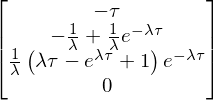

In [143]:
#Solve for BN
term = collect(expand(-1/tau * B__N.dot(X) - X.dot(Matrix([[1], [(1-exp(-lamda * tau))/(lamda*tau)], \
                                           [(1-exp(-lamda * tau))/(lamda*tau)-exp(-lamda *tau)], \
                                           [0]])))
      , [L__N, S, C, L__R])
eqns_list = [term.coeff(var)  for var in [L__N, S, C, L__R]]
B__N = Matrix([solve(eqns_list[i],B__N[i],simplify=True) for i in range(4) ])

B__N


In [145]:
#print B__N in format usable for coding
lmda = Symbol('lmda')
np.reshape(B__N.subs(lamda,lmda).tolist(),(4))

array([-tau, -1/lmda + exp(-lmda*tau)/lmda,
       (lmda*tau - exp(lmda*tau) + 1)*exp(-lmda*tau)/lmda, 0], dtype=object)

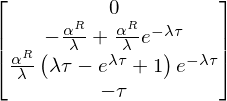

In [147]:
#Solve for BR
term = collect(expand(-1/tau * B__R.dot(X) - X.dot(Matrix([[0], [alpha__R*(1-exp(-lamda * tau))/(lamda*tau)], \
                                           [alpha__R*((1-exp(-lamda * tau))/(lamda*tau)-exp(-lamda *tau))], \
                                           [1]])))
      , [L__N, S, C, L__R])
eqns_list = [term.coeff(var)  for var in [L__N, S, C, L__R]]
B__R = Matrix([solve(eqns_list[i],B__R[i],simplify=True) for i in range(4) ])

B__R

In [149]:
#print B__R in format usable for coding
a = Symbol('a')
np.reshape(B__R.subs(lamda,lmda).subs(alpha__R,a).tolist(),(4))

array([0, -a/lmda + a*exp(-lmda*tau)/lmda,
       a*(lmda*tau - exp(lmda*tau) + 1)*exp(-lmda*tau)/lmda, -tau], dtype=object)

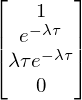

In [150]:
# dB__Ndt 
dB__Ndt = -Matrix([simplify(diff(B__N[i], tau)) for i in range(4)])
dB__Ndt

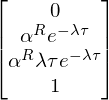

In [151]:
# dB__Rdt
dB__Rdt = -Matrix([simplify(diff(B__R[i], tau)) for i in range(4)])
dB__Rdt

In [152]:
#rho

rho__N_1, rho__R_1 = Matrix([[1], [1], [0], [0]]), Matrix([[0], [alpha__R], [0], [1]])
rho__N_0, rho__R_0 = Matrix([[0], [0], [0], [0]]), Matrix([[0], [0], [0], [0]])

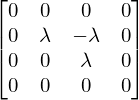

In [153]:
#K__Q
K__Q = Matrix([[0, 0 , 0, 0], [0, lamda,-lamda,0 ], [0,0,lamda,0], [0,0,0,0]])
K__Q

In [154]:
# check
simplify(rho__N_1 + K__Q.T * B__N) == dB__Ndt

True

In [155]:
# check
simplify(rho__R_1 + K__Q.T * B__R) == dB__Rdt

True

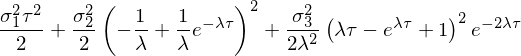

In [156]:
#Solving for G

rho__N_0, rho__R_0  = Matrix([0]) , Matrix([0]) 
theta__Q = Matrix([[0], [0], [0], [0]])

dG__Ndt = trace(rho__N_0 - B__N.T * K__Q * theta__Q )- (1/2.0) * trace(Sigma.T * B__N * B__N.T * Sigma)
dG__Ndtau = nsimplify(collect(- dG__Ndt,[sigma_1**2, sigma_2**2, sigma_3**2, sigma_4**2]))
dG__Ndtau

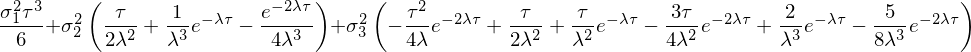

In [157]:
G__N = collect(expand(nsimplify(integrate(dG__Ndtau,tau, conds='none'))),[sigma_1**2, sigma_2**2, sigma_3**2, sigma_4**2])
G__N 

In [160]:
#print G__N in format usable for coding
sigma11,sigma22,sigma33,sigma44 = Symbol('sigma11'),Symbol('sigma22'),Symbol('sigma33'),Symbol('sigma44')

print G__N.subs({lamda:lmda,alpha__R:a,sigma_1:sigma11,sigma_2:sigma22,sigma_3:sigma33,sigma_4:sigma44})

sigma11**2*tau**3/6 + sigma22**2*(tau/(2*lmda**2) + exp(-lmda*tau)/lmda**3 - exp(-2*lmda*tau)/(4*lmda**3)) + sigma33**2*(-tau**2*exp(-2*lmda*tau)/(4*lmda) + tau/(2*lmda**2) + tau*exp(-lmda*tau)/lmda**2 - 3*tau*exp(-2*lmda*tau)/(4*lmda**2) + 2*exp(-lmda*tau)/lmda**3 - 5*exp(-2*lmda*tau)/(8*lmda**3))


In [161]:


dG__Rdt = trace(rho__R_0 - B__R.T * K__Q * theta__Q ) - (1/2.0) * trace(Sigma.T * B__R * B__R.T * Sigma)
dG__Rdtau = nsimplify(collect(- dG__Rdt,[sigma_1**2, sigma_2**2, sigma_3**2, sigma_4**2]))
dG__Rdtau

                                                               2         
                                          ⎛               -λ⋅τ⎞          
                          2             2 ⎜  α__R   α__R⋅ℯ    ⎟          
    2   2 ⎛       λ⋅τ    ⎞   -2⋅λ⋅τ   σ₂ ⋅⎜- ──── + ──────────⎟      2  2
α__R ⋅σ₃ ⋅⎝λ⋅τ - ℯ    + 1⎠ ⋅ℯ             ⎝   λ         λ     ⎠    σ₄ ⋅τ 
─────────────────────────────────── + ────────────────────────── + ──────
                   2                              2                  2   
                2⋅λ                                                      

In [162]:
G__R = collect(expand(nsimplify(integrate(dG__Rdtau,tau, conds='none'))),[sigma_1**2, sigma_2**2, sigma_3**2, sigma_4**2])
G__R 

    ⎛    2         2  -λ⋅τ       2  -2⋅λ⋅τ⎞       ⎛      2  2  -2⋅λ⋅τ       2 
  2 ⎜α__R ⋅τ   α__R ⋅ℯ       α__R ⋅ℯ      ⎟     2 ⎜  α__R ⋅τ ⋅ℯ         α__R ⋅
σ₂ ⋅⎜─────── + ─────────── - ─────────────⎟ + σ₃ ⋅⎜- ──────────────── + ──────
    ⎜     2          3               3    ⎟       ⎜        4⋅λ               2
    ⎝  2⋅λ          λ             4⋅λ     ⎠       ⎝                       2⋅λ 

        2    -λ⋅τ         2    -2⋅λ⋅τ         2  -λ⋅τ         2  -2⋅λ⋅τ⎞     2
τ   α__R ⋅τ⋅ℯ       3⋅α__R ⋅τ⋅ℯ         2⋅α__R ⋅ℯ       5⋅α__R ⋅ℯ      ⎟   σ₄ 
─ + ───────────── - ───────────────── + ───────────── - ───────────────⎟ + ───
           2                  2                3                 3     ⎟     6
          λ                4⋅λ                λ               8⋅λ      ⎠      

  3
⋅τ 
───
   
   

In [163]:
#print G__R in format usable for coding

print G__R.subs({lamda:lmda,alpha__R:a,sigma_1:sigma11,sigma_2:sigma22,sigma_3:sigma33,sigma_4:sigma44})

sigma22**2*(a**2*tau/(2*lmda**2) + a**2*exp(-lmda*tau)/lmda**3 - a**2*exp(-2*lmda*tau)/(4*lmda**3)) + sigma33**2*(-a**2*tau**2*exp(-2*lmda*tau)/(4*lmda) + a**2*tau/(2*lmda**2) + a**2*tau*exp(-lmda*tau)/lmda**2 - 3*a**2*tau*exp(-2*lmda*tau)/(4*lmda**2) + 2*a**2*exp(-lmda*tau)/lmda**3 - 5*a**2*exp(-2*lmda*tau)/(8*lmda**3)) + sigma44**2*tau**3/6


In [165]:
2 ** 4